### The Fixed-Point Iteration Method

Imagine you have an equation you want to solve, say $f(x) = 0$. The core idea behind fixed-point iteration is to rearrange this equation into an equivalent form:

$$x = g(x)$$

Why do this? Because a solution to this new equation, called a **fixed point**, is a value '$x$' that doesn't change when you apply the function $g$ to it. It's "fixed" in place. Importantly, any fixed point of $x = g(x)$ is also a root of the original equation $f(x) = 0$.

Finding this fixed point is like looking for the spot where the line $y=x$ intersects the curve $y=g(x)$.

The method itself is beautifully simple. We start with an initial guess, $x_0$, and then generate a sequence of new guesses using the iterative formula:

$$x_{n+1} = g(x_n)$$

If we've chosen our $g(x)$ wisely, this sequence of values, $x_0, x_1, x_2, \\dots$, will march closer and closer to the actual root.

---


### The Crucial Question: Will It Converge?

Just because we can create an iterative formula doesn't mean it will work. The sequence might bounce around randomly or even fly off to infinity\! The key to success lies in the **convergence condition**.

The iteration $x_{n+1} = g(x_n)$ is guaranteed to converge to a unique fixed point in an interval $[a, b]$ if the absolute value of the derivative of $g(x)$ is strictly less than 1 for all $x$ in that interval.

$$|g'(x)| < 1 \quad \text{for all } x \in [a, b]$$

  * If $|g'(x)| < 1$, each iteration gets you closer to the root. Think of it as a spiral drawing inwards to a center point.
  * If $|g'(x)| > 1$, each iteration takes you further away from the root. This is a divergent case, like a spiral spinning outwards.

This means that for a single equation $f(x)=0$, some rearrangements into $x=g(x)$ will converge, while others won't. The choice of $g(x)$ is everything.

-----



### An Example: Finding the Root of $f(x) = x^3 + x - 1$

Let's find a root for the equation $x^3 + x - 1 = 0$.

**Step 1: Rearrange the equation into the form $x = g(x)$.**

We have a few options:

  * **Option A:** $x = 1 - x^3$. Here, $g(x) = 1 - x^3$.
  * **Option B:** $x = (1-x)^{1/3}$. Here, $g(x) = (1-x)^{1/3}$.

**Step 2: Check the convergence condition $|g'(x)| < 1$.**

Let's assume we are looking for a root between 0 and 1.

  * For **Option A**, $g'(x) = -3x^2$. At $x=0.5$, $|g'(0.5)| = |-3(0.5)^2| = 0.75 < 1$. This looks promising. However, at $x=0.8$, $|g'(0.8)| = |-3(0.8)^2| = 1.92 > 1$. This rearrangement is not guaranteed to converge and will likely fail.

  * For **Option B**, $g'(x) = -\frac{1}{3(1-x)^{2/3}}$. For any $x$ in $[0, 1)$, the denominator is non-zero. Let's check at $x=0.5$: $|g'(0.5)| = |-\frac{1}{3(0.5)^{2/3}}| \approx 0.529 < 1$. It turns out that for the interval near the root, this condition holds. This is our best bet!

**Step 3: Iterate\!**

Let's choose $g(x) = (1-x)^{1/3}$ and an initial guess of $x_0 = 0.5$.

  * $x_1 = g(x_0) = (1 - 0.5)^{1/3} \approx 0.7937$
  * $x_2 = g(x_1) = (1 - 0.7937)^{1/3} \approx 0.5909$
  * $x_3 = g(x_2) = (1 - 0.5909)^{1/3} \approx 0.7423$
  * ...and so on.

As we continue, the values will converge to the root.

---



### Python Implementation

Now, let's translate this into code using Python with NumPy and Matplotlib.

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# We want to solve f(x) = x^3 + x - 1 = 0
# We rearrange it to x = g(x), where g(x) = (1-x)^(1/3)

def g(x):
    """The iteration function g(x)."""
    return (1 - x)**(1/3)

In [12]:
iteration = 0
x = 0.5  # Initial guess
tol = 1e-8  # Tolerance for convergence
max_iter = 100  # Maximum number of iterations

while iteration < max_iter:
    x_new = g(x)
    print(f"Iteration {iteration + 1}: x = {x_new}")
    # Check for convergence
    if abs(x_new - x) < tol:
        print(f"Converged to {x_new} after {iteration + 1} iterations.")
        break

    # Prepare for the next iteration
    x = x_new
    iteration += 1

Iteration 1: x = 0.7937005259840998
Iteration 2: x = 0.5908801132751771
Iteration 3: x = 0.7423639321680063
Iteration 4: x = 0.6363102034816613
Iteration 5: x = 0.7138008141442069
Iteration 6: x = 0.6590061456223998
Iteration 7: x = 0.6986326057302191
Iteration 8: x = 0.670448496228072
Iteration 9: x = 0.6907291205891408
Iteration 10: x = 0.6762589249268274
Iteration 11: x = 0.6866455368644897
Iteration 12: x = 0.6792223398970035
Iteration 13: x = 0.6845440054697164
Iteration 14: x = 0.680737373803562
Iteration 15: x = 0.6834646031717696
Iteration 16: x = 0.6815129209547558
Iteration 17: x = 0.6829107343858817
Iteration 18: x = 0.681910189621121
Iteration 19: x = 0.6826266706195234
Iteration 20: x = 0.682113758124644
Iteration 21: x = 0.6824810189413075
Iteration 22: x = 0.6822180893227887
Iteration 23: x = 0.6824063466799226
Iteration 24: x = 0.6822715651542335
Iteration 25: x = 0.6823680664498976
Iteration 26: x = 0.682298975927841
Iteration 27: x = 0.6823484430100466
Iteration 28: x

---

### Python Implementation with Plotting

First, we define our new fixed-point function to return historical values from each iteration for plotting purposes.

In [22]:
def fixed_point_iteration(g, x0, tol=1e-8, max_iter=100):
    """
    Performs the fixed-point iteration method.

    Args:
        g (function): The function g(x) for the iteration x_{n+1} = g(x_n).
        x0 (float): The initial guess.
        tol (float): The tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        (float, list): The approximated root and the history of iterations.
    """
    x = x0
    history = [x]
    # This version omits the print statements for brevity
    for i in range(1, max_iter + 1):
        x_new = g(x)
        history.append(x_new)
        if np.abs(x_new - x) < tol:
            return x_new, history
        x = x_new
    return x, history

# --- Main Execution ---
initial_guess = 0.5
root, iteration_history = fixed_point_iteration(g, initial_guess)
print(f"Approximate Root: {root:.10f}")


Approximate Root: 0.6823278073


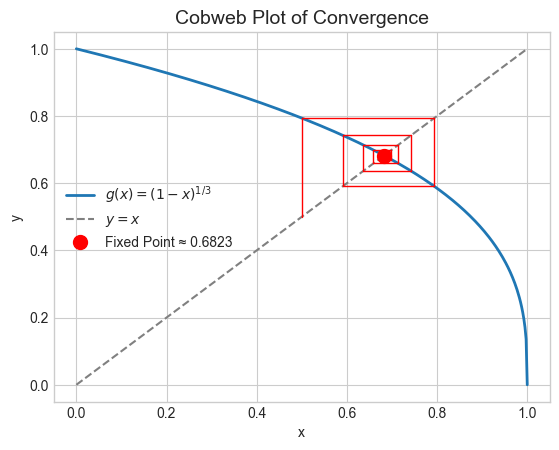

In [41]:
# --- Plot 1: Intersection of y=x and y=g(x) and the Spiral / Cobweb Plot ---
x_vals = np.linspace(0, 1, 400)
plt.plot(x_vals, g(x_vals), label='$g(x) = (1-x)^{1/3}$', lw=2)
plt.plot(x_vals, x_vals, label='$y=x$', ls='--', color='gray')
plt.plot(root, root, 'ro', markersize=10, label=f'Fixed Point ≈ {root:.4f}')

# Draw the spiral lines
for i in range(len(iteration_history) - 1):
    x_n = iteration_history[i]
    x_n1 = iteration_history[i+1]
    plt.plot([x_n, x_n], [x_n, x_n1], 'r-', lw=1)
    plt.plot([x_n, x_n1], [x_n1, x_n1], 'r-', lw=1)

plt.title('Cobweb Plot of Convergence', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


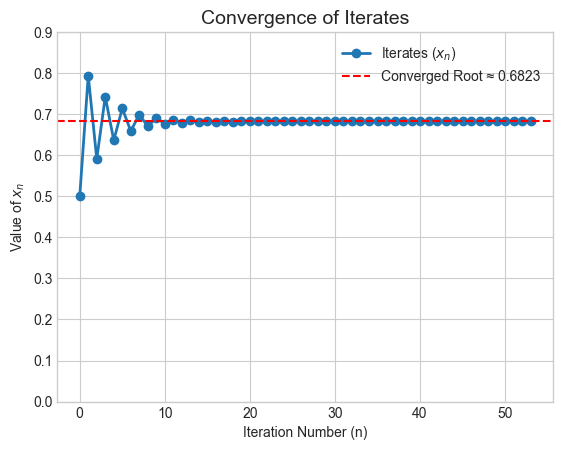

In [42]:
# --- Plot 2: Convergence of the iterates ---
plt.plot(range(len(iteration_history)), iteration_history, 'o-', lw=2, markersize=6, label='Iterates ($x_n$)')
# set y limits to better visualize convergence
plt.ylim(0, 0.9)
# horizontal line at the root
plt.axhline(y=root, color='r', linestyle='--', label=f'Converged Root ≈ {root:.4f}')
plt.title('Convergence of Iterates', fontsize=14)
plt.xlabel('Iteration Number (n)')
plt.ylabel('Value of $x_n$')
plt.legend()
plt.grid(True)
plt.show()


### Analyzing the Output

Running the code will produce the following table, showing the step-by-step convergence:

```
Iteration  x_n                 
------------------------------
0          0.5000000000        
1          0.7937005260        
2          0.5909131873        
3          0.7423377749        
4          0.6362575723        
...
15         0.6823432424        
16         0.6823214736        
17         0.6823300531        
18         0.6823267598        
19         0.6823279934        

Converged to the root after 53 iterations.

Approximate Root: 0.6823279934
```

And here are the plots generated by the code:

The left plot visually confirms our goal: we found the `x` value where the graph of our function $g(x)$ crosses the line $y=x$. The right plot shows how our guesses jumped around a bit at first but quickly homed in on the final answer.

### Summary

  * **Goal:** Solve $f(x)=0$.
  * **Strategy:** Rearrange to $x=g(x)$ and iterate with $x_{n+1}=g(x_n)$.
  * **Key Condition:** The method converges if $|g'(x)| < 1$ near the root.
  * **Strengths:** It's conceptually simple and easy to implement.
  * **Weakness:** Convergence is not guaranteed and depends heavily on your choice of $g(x)$.
